In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer, f1_score, confusion_matrix, plot_confusion_matrix
import pickle

In [2]:
#df = pd.read_csv("../data/nfip_claims_ML.csv")
df = pd.read_csv("../data/FimaNfipClaims.csv", dtype={'countyCode': 'str', 'reportedZipcode': 'str'})

In [3]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2021-07-24T00:00:00.000Z,NaN,1.0,Temporarily Unavailable,N,1.0,24033,5.0,2007-01-01T00:00:00.000Z,0.0,NaN,NaN,2.403380e+10,X,0.0,38.8,-77.0,0,NaN,0.0,3.0,0.0,NaN,1.0,1953-01-01T00:00:00.000Z,2006-11-15T00:00:00.000Z,NaN,NaN,NaN,0.0,7,0.0,MD,100000.0,40000.0,2007,20745,1.0,babe8abc-eae6-49f4-a5d6-b892b1087a45
1,0.0,2021-07-24T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,30009,NaN,2011-07-12T00:00:00.000Z,1.0,NaN,NaN,3.000900e+10,AE,0.0,45.2,-109.2,0,NaN,0.0,2.0,0.0,50.0,1.0,1975-01-01T00:00:00.000Z,2011-04-13T00:00:00.000Z,593.50,NaN,NaN,0.0,1,0.0,MT,150000.0,0.0,2011,59068,1.0,dbc2a6cc-192f-47ee-bd3c-e76bcc6a2350
2,0.0,2021-11-20T00:00:00.000Z,50.0,NaN,Temporarily Unavailable,N,1.0,48201,5.0,2001-06-09T00:00:00.000Z,0.0,3.0,0.0,4.820141e+10,AE,0.0,29.7,-95.4,0,49.5,50.0,2.0,0.0,10.0,1.0,1983-01-01T00:00:00.000Z,1999-06-16T00:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,TX,25000.0,25000.0,2001,77025,1.0,547d731b-b35f-4d60-a903-15cc8a4d12df
3,0.0,2021-11-20T00:00:00.000Z,9.0,NaN,Temporarily Unavailable,N,1.0,12103,5.0,1996-10-07T00:00:00.000Z,1.0,NaN,0.0,1.210302e+10,AE,0.0,27.9,-82.6,0,NaN,8.9,2.0,0.0,10.0,1.0,1969-01-01T00:00:00.000Z,1995-06-30T00:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,FL,150000.0,35000.0,1996,33702,1.0,18e7a2e8-5b52-4cdd-82a2-9112dbbc953b
4,0.0,2021-11-20T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,24029,NaN,2003-09-19T00:00:00.000Z,1.0,NaN,NaN,2.402995e+10,AE,0.0,39.1,-76.1,0,NaN,0.0,2.0,0.0,10.0,1.0,1980-01-01T00:00:00.000Z,1999-06-10T00:00:00.000Z,31311.04,4329.25,NaN,0.0,1,0.0,MD,75000.0,10000.0,2003,21620,0.0,40c5393a-03a4-41ed-8fb3-4b3de1e28534


In [6]:
#df.drop(["amountPaidonTotalClaim", "yearOfLoss", "Unnamed: 0", "LossRatio", "amountPaidOnBuildingClaim", "amountPaidOnContentsClaim", "amountPaidOnIncreasedCostOfComplianceClaim", "latitude", "longitude", "countyCode"], inplace=True, axis=1)
#df.claim_segmentation = [1 if x==0 else 0 for x in df.claim_segmentation] # keep reportedZip # predict tghe 

In [7]:
#df = pd.get_dummies(df, drop_first=True)
#df.head()

In [8]:
#df.to_csv("../data/claims_dummied.csv", index=False)

In [9]:
df['amountPaidOnBuildingClaim'] = np.abs(df.amountPaidOnBuildingClaim)
df['amountPaidOnContentsClaim'] = np.abs(df.amountPaidOnContentsClaim)
df[['amountPaidOnBuildingClaim','amountPaidOnContentsClaim']] = df[['amountPaidOnBuildingClaim','amountPaidOnContentsClaim']].fillna(value=0)
df['amountPaidOnTotalClaim'] = df.amountPaidOnBuildingClaim + df.amountPaidOnContentsClaim

In [10]:
claim_segmentation = []
for row in df['amountPaidOnTotalClaim']:
        if row == 0 :    
            claim_segmentation.append(0)
        else:  
            claim_segmentation.append(1)

df['claim_segmentation'] = claim_segmentation

In [11]:
df.head()

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,amountPaidOnTotalClaim,claim_segmentation
0,0.0,2021-07-24T00:00:00.000Z,NaN,1.0,Temporarily Unavailable,N,1.0,24033,5.0,2007-01-01T00:00:00.000Z,0.0,NaN,NaN,2.403380e+10,X,0.0,38.8,-77.0,0,NaN,0.0,3.0,0.0,NaN,1.0,1953-01-01T00:00:00.000Z,2006-11-15T00:00:00.000Z,0.00,0.00,NaN,0.0,7,0.0,MD,100000.0,40000.0,2007,20745,1.0,babe8abc-eae6-49f4-a5d6-b892b1087a45,0.00,0
1,0.0,2021-07-24T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,30009,NaN,2011-07-12T00:00:00.000Z,1.0,NaN,NaN,3.000900e+10,AE,0.0,45.2,-109.2,0,NaN,0.0,2.0,0.0,50.0,1.0,1975-01-01T00:00:00.000Z,2011-04-13T00:00:00.000Z,593.50,0.00,NaN,0.0,1,0.0,MT,150000.0,0.0,2011,59068,1.0,dbc2a6cc-192f-47ee-bd3c-e76bcc6a2350,593.50,1
2,0.0,2021-11-20T00:00:00.000Z,50.0,NaN,Temporarily Unavailable,N,1.0,48201,5.0,2001-06-09T00:00:00.000Z,0.0,3.0,0.0,4.820141e+10,AE,0.0,29.7,-95.4,0,49.5,50.0,2.0,0.0,10.0,1.0,1983-01-01T00:00:00.000Z,1999-06-16T00:00:00.000Z,0.00,0.00,NaN,1.0,1,0.0,TX,25000.0,25000.0,2001,77025,1.0,547d731b-b35f-4d60-a903-15cc8a4d12df,0.00,0
3,0.0,2021-11-20T00:00:00.000Z,9.0,NaN,Temporarily Unavailable,N,1.0,12103,5.0,1996-10-07T00:00:00.000Z,1.0,NaN,0.0,1.210302e+10,AE,0.0,27.9,-82.6,0,NaN,8.9,2.0,0.0,10.0,1.0,1969-01-01T00:00:00.000Z,1995-06-30T00:00:00.000Z,0.00,0.00,NaN,0.0,1,0.0,FL,150000.0,35000.0,1996,33702,1.0,18e7a2e8-5b52-4cdd-82a2-9112dbbc953b,0.00,0
4,0.0,2021-11-20T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,24029,NaN,2003-09-19T00:00:00.000Z,1.0,NaN,NaN,2.402995e+10,AE,0.0,39.1,-76.1,0,NaN,0.0,2.0,0.0,10.0,1.0,1980-01-01T00:00:00.000Z,1999-06-10T00:00:00.000Z,31311.04,4329.25,NaN,0.0,1,0.0,MD,75000.0,10000.0,2003,21620,0.0,40c5393a-03a4-41ed-8fb3-4b3de1e28534,35640.29,1


In [12]:
# df.claim_segmentation = [1 if x==0 else 0 for x in df.claim_segmentation] # keep reportedZip # predict the claims approved 


### In the next cell, make sure to remove the target column from the appropiate list! 

In [13]:
delete = ['id','reportedCity']
cat_features = ['agricultureStructureIndicator','basementEnclosureCrawlspace','condominiumIndicator','countyCode','communityRatingSystemDiscount',\
                'elevatedBuildingIndicator','elevationCertificateIndicator','censusTract','floodZone','houseWorship','locationOfContents','smallBusinessIndicatorBuilding',\
                'numberOfFloorsInTheInsuredBuilding','nonProfitIndicator','obstructionType','occupancyType','postFIRMConstructionIndicator','rateMethod',\
                'smallBusinessIndicatorBuilding','primaryResidence'
                ]
time_features = ['asOfDate', 'dateOfLoss', 'originalConstructionDate', 'originalNBDate', 'yearOfLoss']
geo_features = ['latitude','longitude','countyCode','state','reportedZipcode']
num_features = ['baseFloodElevation','policyCount','elevationDifference','lowestAdjacentGrade','lowestFloorElevation','amountPaidOnBuildingClaim',\
                'amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','totalBuildingInsuranceCoverage','totalContentsInsuranceCoverage']
key = ['amountPaidOnBuildingClaim','amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','amountPaidOnTotalClaim']
target = ['claim_segmentation']

In [14]:
# create lists of features that need encoding or scaling
#cat_features = list(df.select_dtypes(exclude="number").columns)
#num_features = list(df.select_dtypes(include="number").columns)
#num_features.remove("claim_segmentation")
#cat_features = cat_features + ['countyCode','state','reportedZipcode']
cat_features = cat_features + geo_features

In [15]:
df.drop(delete, axis=1, inplace=True)

In [16]:
# create a column transformer out of a scaler for the numerical and an encoder for the categorical columns 
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    #("num", scaler, num_features),
    ("cat", encoder, cat_features)
])

In [17]:
# build pipe and name its components
pipe = Pipeline([
("preprocessor", preprocessor),
("clf", XGBClassifier(random_state=42, subsample=0.7999999999999999, n_estimators=250, max_depth=10, 
            learning_rate=0.3, colsample_bytree=0.6, colsample_bylevel=0.5))
])

In [18]:
# train test split
y = df.pop("claim_segmentation")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
print(f'Train/test split\n----------\nTrain size: {X_train.shape[0]:,.0f}\nTest size: {X_test.shape[0]:,.0f}')

Train/test split
----------
Train size: 1,927,566
Test size: 642,523


In [20]:
X_train.drop('amountPaidOnTotalClaim', axis=1, inplace=True)
X_test.drop('amountPaidOnTotalClaim', axis=1, inplace=True)

In [21]:
print(X_train.columns)
print(X_test.columns)

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'condominiumIndicator', 'policyCount',
       'countyCode', 'communityRatingSystemDiscount', 'dateOfLoss',
       'elevatedBuildingIndicator', 'elevationCertificateIndicator',
       'elevationDifference', 'censusTract', 'floodZone', 'houseWorship',
       'latitude', 'longitude', 'locationOfContents', 'lowestAdjacentGrade',
       'lowestFloorElevation', 'numberOfFloorsInTheInsuredBuilding',
       'nonProfitIndicator', 'obstructionType', 'occupancyType',
       'originalConstructionDate', 'originalNBDate',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryResidence'],
      dtype='obj

In [22]:
# fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['agricultureStructureIndicator',
                                                   'basementEnclosureCrawlspace',
                                                   'condominiumIndicator',
                                                   'countyCode',
                                                   'communityRatingSystemDiscount',
                                                   'elevatedBuildingIndicator',
                                                   'elevationCertificateIndicator',
                                                   'censusTract', 'floodZone',
                                                   'houseWorship',
                                                   'locatio...
                               gamma=0, gpu_id=-1, grow_p

In [23]:
# if you're ready to look at the result on the test data
pipe.score(X_test, y_test)

0.7908619613616944

In [4]:
pipe

NameError: name 'pipe' is not defined

In [24]:
# confusion matrix
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 22041, 123369],
       [ 11007, 486106]])

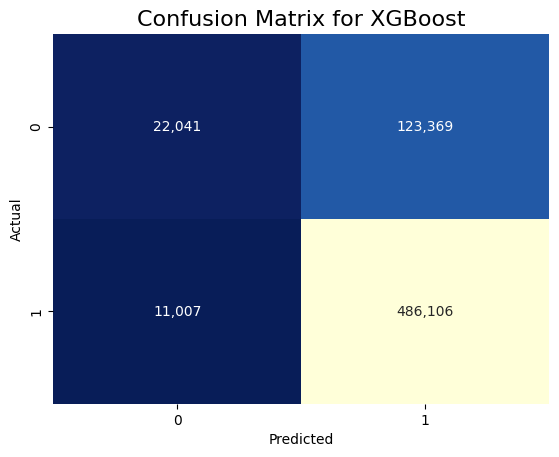

In [33]:
xgb_conf_matrix = sns.heatmap(cm, cmap="YlGnBu_r", annot=True, fmt=",.0f", cbar=False);
xgb_conf_matrix.set_xlabel('Predicted', fontsize=10)
xgb_conf_matrix.set_ylabel('Actual', fontsize=10)
plt.title("Confusion Matrix for XGBoost", fontsize =16)
plt.savefig('../images/confusion_matrix_xgb.png')

In [32]:
print('Weighted F1 score:',f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 0.735640317756193


In [3]:
pipe

NameError: name 'pipe' is not defined

In [37]:
prop_cm = np.array([[37009,117197],[117196,371121]])

In [38]:
prop_cm

array([[ 37009, 117197],
       [117196, 371121]])

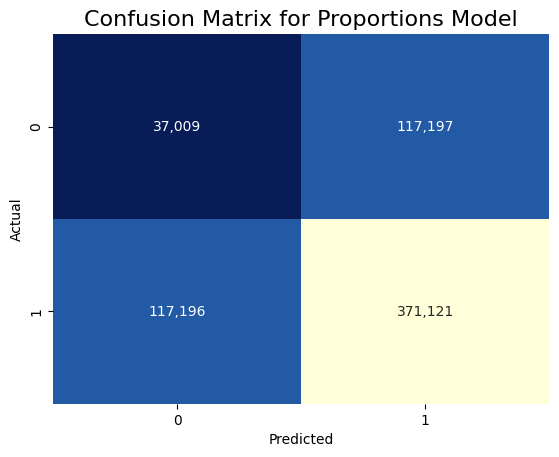

In [39]:
prop_conf_matrix = sns.heatmap(prop_cm, cmap="YlGnBu_r", annot=True, fmt=",.0f", cbar=False)
prop_conf_matrix.set_xlabel('Predicted', fontsize=10)
prop_conf_matrix.set_ylabel('Actual', fontsize=10)
plt.title("Confusion Matrix for Proportions Model", fontsize =16)
plt.savefig('../images/confusion_matrix_prop.png')

In [2]:
# save trained model
import pickle 
filename = '../models/xgboost_model_full-features-county-zip-encoded.pickle' # PICK A FILE NAME, SHOULD END IN .pickle
pickle.dump(pipe, open(filename, "wb"))

NameError: name 'pipe' is not defined